In [5]:
import pandas as pd
from fedot import Fedot
from fedot.core.data.data import InputData
from fedot.core.repository.tasks import Task, TaskTypesEnum
from fedot.core.repository.dataset_types import DataTypesEnum
from fedot.core.data.data_split import train_test_data_setup

from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [9]:
data = pd.read_csv(train_data_path, index_col='id')
data

,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,Encroachments,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
id,,,,,,,,,,,,,,,,,,,,,
0,5,8,5,8,6,4,4,3,3,4,...,5,3,3,5,4,7,5,7,3,0.445
1,6,7,4,4,8,8,3,5,4,6,...,7,2,0,3,5,3,3,4,3,0.450
2,6,5,6,7,3,7,1,5,4,5,...,7,3,7,5,6,8,2,3,3,0.530
3,3,4,6,5,4,8,4,7,6,8,...,2,4,7,4,4,6,5,7,5,0.535
4,5,3,2,6,4,4,3,3,3,3,...,2,2,6,6,4,1,2,3,5,0.415
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1117952,3,3,4,10,4,5,5,7,10,4,...,7,8,7,2,2,1,4,6,4,0.495
1117953,2,2,4,3,9,5,8,1,3,5,...,9,4,4,3,7,4,9,4,5,0.480
1117954,7,3,9,4,6,5,9,1,3,4,...,5,5,5,5,6,5,5,2,4,0.485


In [7]:
train_data_path = '/Users/vadim/Desktop/FEDOT Intro/playground-series-s4e5/train.csv'
test_data_path = '/Users/vadim/Desktop/FEDOT Intro/playground-series-s4e5/test.csv'

df = pd.read_csv(train_data_path)
df_1000 = df[::100]
data = InputData.from_dataframe(df_1000.drop('FloodProbability', axis=1),
                                df_1000.FloodProbability,
                                task=Task(TaskTypesEnum.regression),
                                data_type=DataTypesEnum.table
                               )
train, test = train_test_data_setup(data)

## Максимально AutoML'ное решение:

In [9]:
model = Fedot(problem='regression', timeout=60)

pipeline = model.fit(train)

2025-02-24 20:49:37,990 - ApiComposer - Initial pipeline was fitted in 4.0 sec.
2025-02-24 20:49:37,991 - ApiComposer - Taking into account n_folds=5, estimated fit time for initial assumption is 20.0 sec.
2025-02-24 20:49:37,992 - AssumptionsHandler - Preset was changed to best_quality due to fit time estimation for initial model.
2025-02-24 20:49:37,996 - ApiComposer - AutoML configured. Parameters tuning: True. Time limit: 60 min. Set of candidate models: ['adareg', 'catboostreg', 'dtreg', 'fast_ica', 'isolation_forest_reg', 'knnreg', 'lasso', 'lgbmreg', 'linear', 'normalization', 'pca', 'poly_features', 'ransac_lin_reg', 'ransac_non_lin_reg', 'rfr', 'ridge', 'scaling', 'sgdr', 'svr', 'xgboostreg'].
2025-02-24 20:49:38,016 - ApiComposer - Pipeline composition started.


Generations:   0%|                                   | 0/10000 [00:00<?, ?gen/s]

2025-02-24 20:49:58,671 - MultiprocessingDispatcher - 3 individuals out of 3 in previous population were evaluated successfully.
2025-02-24 20:52:53,634 - MultiprocessingDispatcher - 19 individuals out of 21 in previous population were evaluated successfully.
2025-02-24 20:53:14,067 - NonLinearRegRANSACImplementation - RANSAC: multiplied residual_threshold on 2
2025-02-24 20:53:30,872 - NonLinearRegRANSACImplementation - RANSAC: multiplied residual_threshold on 2
2025-02-24 20:53:47,322 - NonLinearRegRANSACImplementation - RANSAC: multiplied residual_threshold on 2
2025-02-24 20:54:03,503 - NonLinearRegRANSACImplementation - RANSAC: multiplied residual_threshold on 2
2025-02-24 20:54:20,447 - NonLinearRegRANSACImplementation - RANSAC: multiplied residual_threshold on 2
2025-02-24 20:54:36,552 - NonLinearRegRANSACImplementation - RANSAC: multiplied residual_threshold on 2
2025-02-24 20:54:53,022 - NonLinearRegRANSACImplementation - RANSAC: multiplied residual_threshold on 2
2025-02-24 2

Generations:   0%|                     | 1/10000 [06:06<1017:05:01, 366.19s/gen]

2025-02-24 20:55:48,372 - MultiprocessingDispatcher - 18 individuals out of 18 in previous population were evaluated successfully.
2025-02-24 20:55:51,970 - MultiprocessingDispatcher - 15 individuals out of 15 in previous population were evaluated successfully.


Generations:   0%|                      | 2/10000 [06:13<431:27:00, 155.35s/gen]

2025-02-24 20:56:12,429 - NonLinearRegRANSACImplementation - RANSAC: multiplied residual_threshold on 2
2025-02-24 20:56:28,410 - NonLinearRegRANSACImplementation - RANSAC: multiplied residual_threshold on 2
2025-02-24 20:56:44,545 - NonLinearRegRANSACImplementation - RANSAC: multiplied residual_threshold on 2
2025-02-24 20:57:00,705 - NonLinearRegRANSACImplementation - RANSAC: multiplied residual_threshold on 2
2025-02-24 20:57:16,905 - NonLinearRegRANSACImplementation - RANSAC: multiplied residual_threshold on 2
2025-02-24 20:57:33,386 - NonLinearRegRANSACImplementation - RANSAC: multiplied residual_threshold on 2
2025-02-24 20:57:49,903 - NonLinearRegRANSACImplementation - RANSAC: multiplied residual_threshold on 2
2025-02-24 20:58:06,824 - NonLinearRegRANSACImplementation - RANSAC: multiplied residual_threshold on 2
2025-02-24 20:58:23,552 - NonLinearRegRANSACImplementation - RANSAC: multiplied residual_threshold on 2
2025-02-24 20:58:40,035 - NonLinearRegRANSACImplementation - RAN

Generations:   0%|                      | 3/10000 [12:10<686:55:35, 247.37s/gen]

2025-02-24 21:04:44,082 - MultiprocessingDispatcher - 42 individuals out of 42 in previous population were evaluated successfully.
2025-02-24 21:04:48,910 - MultiprocessingDispatcher - 12 individuals out of 12 in previous population were evaluated successfully.
2025-02-24 21:04:48,923 - MultiprocessingDispatcher - 33 individuals out of 33 in previous population were evaluated successfully.


Generations:   0%|                      | 4/10000 [15:10<613:06:07, 220.81s/gen]

2025-02-24 21:05:02,944 - MultiprocessingDispatcher - 23 individuals out of 23 in previous population were evaluated successfully.
2025-02-24 21:05:14,224 - MultiprocessingDispatcher - 10 individuals out of 10 in previous population were evaluated successfully.


Generations:   0%|                      | 5/10000 [15:36<417:18:33, 150.31s/gen]

2025-02-24 21:08:13,377 - MultiprocessingDispatcher - 27 individuals out of 27 in previous population were evaluated successfully.
2025-02-24 21:08:17,846 - MultiprocessingDispatcher - 5 individuals out of 5 in previous population were evaluated successfully.


Generations:   0%|                      | 6/10000 [18:39<448:42:47, 161.63s/gen]

2025-02-24 21:09:39,604 - MultiprocessingDispatcher - 22 individuals out of 24 in previous population were evaluated successfully.
2025-02-24 21:12:32,143 - MultiprocessingDispatcher - 11 individuals out of 12 in previous population were evaluated successfully.


Generations:   0%|                      | 7/10000 [22:54<532:45:34, 191.93s/gen]

2025-02-24 21:15:28,017 - MultiprocessingDispatcher - 24 individuals out of 25 in previous population were evaluated successfully.
2025-02-24 21:15:33,725 - MultiprocessingDispatcher - 9 individuals out of 9 in previous population were evaluated successfully.


Generations:   0%|                      | 8/10000 [25:55<523:33:54, 188.63s/gen]

2025-02-24 21:18:39,380 - MultiprocessingDispatcher - 29 individuals out of 29 in previous population were evaluated successfully.
2025-02-24 21:19:01,829 - MultiprocessingDispatcher - 27 individuals out of 29 in previous population were evaluated successfully.
2025-02-24 21:19:01,844 - MultiprocessingDispatcher - 46 individuals out of 46 in previous population were evaluated successfully.


Generations:   0%|                      | 9/10000 [29:23<540:24:45, 194.72s/gen]

2025-02-24 21:19:13,067 - NonLinearRegRANSACImplementation - RANSAC: multiplied residual_threshold on 2
2025-02-24 21:19:13,068 - NonLinearRegRANSACImplementation - RANSAC: multiplied residual_threshold on 2
2025-02-24 21:19:13,068 - NonLinearRegRANSACImplementation - RANSAC: multiplied residual_threshold on 2
2025-02-24 21:19:13,068 - NonLinearRegRANSACImplementation - RANSAC: multiplied residual_threshold on 2
2025-02-24 21:19:13,068 - NonLinearRegRANSACImplementation - RANSAC: multiplied residual_threshold on 2
2025-02-24 21:19:13,068 - NonLinearRegRANSACImplementation - RANSAC: multiplied residual_threshold on 2
2025-02-24 21:19:13,068 - NonLinearRegRANSACImplementation - RANSAC: multiplied residual_threshold on 2
2025-02-24 21:19:13,068 - NonLinearRegRANSACImplementation - RANSAC: multiplied residual_threshold on 2
2025-02-24 21:19:13,068 - NonLinearRegRANSACImplementation - RANSAC: multiplied residual_threshold on 2
2025-02-24 21:19:13,069 - NonLinearRegRANSACImplementation - RAN

Generations:   0%|                     | 10/10000 [30:05<409:37:37, 147.61s/gen]

2025-02-24 21:20:34,203 - NonLinearRegRANSACImplementation - RANSAC: multiplied residual_threshold on 2
2025-02-24 21:20:56,002 - NonLinearRegRANSACImplementation - RANSAC: multiplied residual_threshold on 2
2025-02-24 21:21:16,492 - NonLinearRegRANSACImplementation - RANSAC: multiplied residual_threshold on 2
2025-02-24 21:21:36,391 - NonLinearRegRANSACImplementation - RANSAC: multiplied residual_threshold on 2
2025-02-24 21:21:55,925 - NonLinearRegRANSACImplementation - RANSAC: multiplied residual_threshold on 2
2025-02-24 21:22:15,885 - NonLinearRegRANSACImplementation - RANSAC: multiplied residual_threshold on 2
2025-02-24 21:22:36,907 - NonLinearRegRANSACImplementation - RANSAC: multiplied residual_threshold on 2
2025-02-24 21:22:59,466 - NonLinearRegRANSACImplementation - RANSAC: multiplied residual_threshold on 2
2025-02-24 21:23:20,528 - NonLinearRegRANSACImplementation - RANSAC: multiplied residual_threshold on 2
2025-02-24 21:23:39,988 - NonLinearRegRANSACImplementation - RAN

Generations:   0%|                     | 11/10000 [34:54<529:17:18, 190.75s/gen]

2025-02-24 21:24:32,591 - GroupedCondition - Optimisation stopped: Time limit is reached


Generations:   0%|                     | 11/10000 [34:54<528:21:03, 190.42s/gen]

2025-02-24 21:24:32,597 - ApiComposer - Hyperparameters tuning started with 25 min. timeout


2025-02-24 21:24:35,953 - SimultaneousTuner - Initial graph: {'depth': 2, 'length': 2, 'nodes': [lgbmreg, linear]}
lgbmreg - {'boosting_type': 'gbdt', 'max_depth': -1, 'bagging_fraction': 0.85, 'extra_trees': False, 'enable_categorical': True, 'use_eval_set': True, 'early_stopping_rounds': 30, 'n_jobs': 1, 'verbose': -1}
linear - {} 
Initial metric: [0.019]
  0%| | 361/100000 [25:02<115:12:06,  4.16s/trial, best loss: 0.0189664121941979
2025-02-24 21:49:41,784 - SimultaneousTuner - Final graph: {'depth': 2, 'length': 2, 'nodes': [lgbmreg, linear]}
lgbmreg - {'boosting_type': 'gbdt', 'max_depth': -1, 'bagging_fraction': 0.06315207520018906, 'extra_trees': False, 'enable_categorical': True, 'use_eval_set': True, 'early_stopping_rounds': 33, 'n_jobs': 1, 'verbose': -1, 'colsample_bytree': 0.7498936381128543, 'force_col_wise': False, 'force_row_wise ': False, 'learning_rate': 0.18545666878517264, 'min_data_in_leaf': 35, 'num_leaves': 6, 'objective': 'poisson', 'reg_alpha': 1.30711840352092

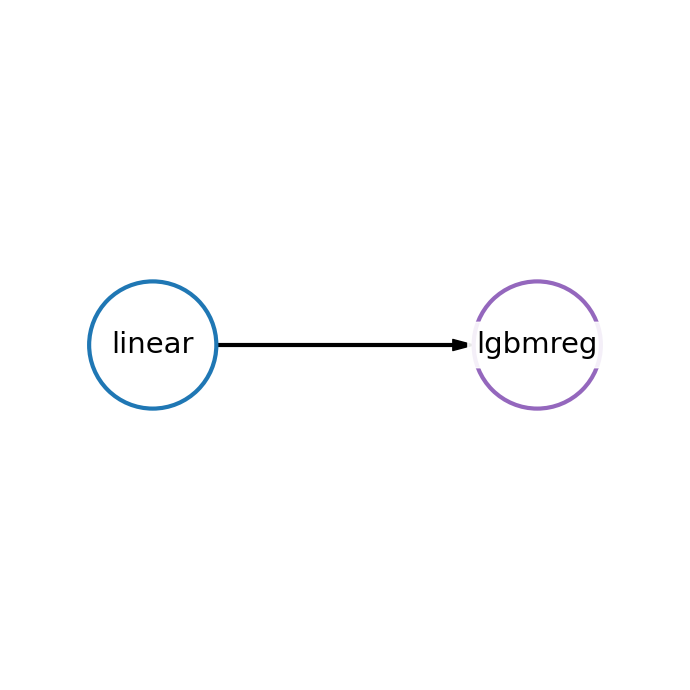

In [10]:
pipeline.show()

In [11]:
# метрика модели, обученной на 1/100 тренировочного датасета
prediction = model.predict(test)
r2_score_100 = r2_score(test.target, prediction)
print(r2_score_100)

0.8525068977718009


In [12]:
new_data = pd.read_csv(test_data_path)
prediction = model.predict(new_data)

In [13]:
new_data['FloodProbability'] = prediction
new_data = new_data[['id', 'FloodProbability']]
new_data

,id,FloodProbability
0,1117957,0.575551
1,1117958,0.448280
2,1117959,0.448176
3,1117960,0.471475
4,1117961,0.473621
...,...,...
745300,1863257,0.472495
745301,1863258,0.433043
745302,1863259,0.620580
745303,1863260,0.549211


In [14]:
new_data.to_csv('/Users/vadim/Desktop/FEDOT Intro/playground-series-s4e5/submission_2.4.csv', index=False)